<a href="https://colab.research.google.com/github/tpeterz/happy-flix/blob/main/Reviews_Combined_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading from the **combined_movies.csv** file
#### This csv file containes data from movies spanning from 1970 - 2024
- Total movies: 6,123

In [ ]:
import pandas as pd
import requests

movie_df = pd.read_csv('../Resources/combined_movies.csv')
# An 'Unnamed' column would be created without the below code, we want to exclude it
# Because it is a copy of the index, but as an additional column
movie_df = movie_df.drop(columns=['Unnamed: 0'])
movie_df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,reviews
0,False,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,"[878, 12]",693134,en,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,/1pdfLvkbY9ohJlCjQH2CZjjYVvJ.jpg,2024-02-27,Dune: Part Two,False,8.311,2707,FULL SPOILER-FREE REVIEW @ https://talkingfilm...
1,False,/1XDDXPXGiI8id7MrUxK36ke7gkX.jpg,"[16, 28, 12, 35, 10751]",1011985,en,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,/f7QBvIzoWSJw3jWPGnZBc5vwQ0l.jpg,2024-03-02,Kung Fu Panda 4,False,7.066,897,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...
2,False,/j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg,"[28, 878, 12, 14]",823464,en,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,/tMefBSflR6PGQLv7WvFPpKLZkyk.jpg,2024-03-27,Godzilla x Kong: The New Empire,False,6.700,575,FULL SPOILER-FREE REVIEW @ https://fandomwire....
3,False,/oe7mWkvYhK4PLRNAVSvonzyUXNy.jpg,"[28, 53]",359410,en,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,/bXi6IQiQDHD00JFio5ZSZOeRSBh.jpg,2024-03-08,Road House,False,7.066,1379,Very poor scenario and the story just does not...
4,False,/pwGmXVKUgKN13psUjlhC9zBcq1o.jpg,"[28, 14]",634492,en,Madame Web,"Forced to confront revelations about her past,...",921.140,/rULWuutDcN5NvtiZi4FRPzRYWSh.jpg,2024-02-14,Madame Web,False,5.676,1046,We start off with an heavily pregnant woman de...


In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6123 entries, 0 to 6122
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              6123 non-null   bool   
 1   backdrop_path      6064 non-null   object 
 2   genre_ids          6123 non-null   object 
 3   id                 6123 non-null   int64  
 4   original_language  6123 non-null   object 
 5   original_title     6123 non-null   object 
 6   overview           6123 non-null   object 
 7   popularity         6123 non-null   float64
 8   poster_path        6119 non-null   object 
 9   release_date       6123 non-null   object 
 10  title              6123 non-null   object 
 11  video              6123 non-null   bool   
 12  vote_average       6123 non-null   float64
 13  vote_count         6123 non-null   int64  
 14  reviews            6123 non-null   object 
dtypes: bool(2), float64(2), int64(2), object(9)
memory usage: 634.0+ KB


## Cleaning up the 'reviews' column

In [ ]:
import pandas as pd
import numpy as np
import re
from string import punctuation
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

# Remove URLs from text string
def remove_urls(text, replacement_text="[URL REMOVED]"):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text_without_urls = url_pattern.sub(replacement_text, text)
    return text_without_urls

# Remove any review text that contains "full spoiler-free review [url]..."
def remove_specific_phrases(text):
    phrase_pattern = re.compile(r'full spoiler-free review.*\[URL REMOVED\].*', re.IGNORECASE)
    text_without_phrases = phrase_pattern.sub('', text)
    return text_without_phrases

# Clean the text
def clean_doc(doc):
    doc = remove_urls(doc)
    doc = remove_specific_phrases(doc)
    doc = doc.lower()
    table = str.maketrans('', '', punctuation)
    doc = doc.translate(table)
    tokens = doc.split()
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

# Add clean_reviews column to store the clean reviews created above
movie_df['cleaned_reviews'] = movie_df['reviews'].apply(clean_doc)

# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(movie_df['cleaned_reviews'])
X = tokenizer.texts_to_matrix(movie_df['cleaned_reviews'])

In [ ]:
# Review our new dataframe
movie_df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,reviews,cleaned_reviews
0,False,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,"[878, 12]",693134,en,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,/1pdfLvkbY9ohJlCjQH2CZjjYVvJ.jpg,2024-02-27,Dune: Part Two,False,8.311,2707,FULL SPOILER-FREE REVIEW @ https://talkingfilm...,dune part two surpasses even highest expectati...
1,False,/1XDDXPXGiI8id7MrUxK36ke7gkX.jpg,"[16, 28, 12, 35, 10751]",1011985,en,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,/f7QBvIzoWSJw3jWPGnZBc5vwQ0l.jpg,2024-03-02,Kung Fu Panda 4,False,7.066,897,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...,kung fu panda best kung fu panda film even bes...
2,False,/j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg,"[28, 878, 12, 14]",823464,en,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,/tMefBSflR6PGQLv7WvFPpKLZkyk.jpg,2024-03-27,Godzilla x Kong: The New Empire,False,6.700,575,FULL SPOILER-FREE REVIEW @ https://fandomwire....,godzilla kong new empire version previous inst...
3,False,/oe7mWkvYhK4PLRNAVSvonzyUXNy.jpg,"[28, 53]",359410,en,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,/bXi6IQiQDHD00JFio5ZSZOeRSBh.jpg,2024-03-08,Road House,False,7.066,1379,Very poor scenario and the story just does not...,poor scenario story add ending also convincing...
4,False,/pwGmXVKUgKN13psUjlhC9zBcq1o.jpg,"[28, 14]",634492,en,Madame Web,"Forced to confront revelations about her past,...",921.140,/rULWuutDcN5NvtiZi4FRPzRYWSh.jpg,2024-02-14,Madame Web,False,5.676,1046,We start off with an heavily pregnant woman de...,start heavily pregnant woman deep peruvian jun...


In [ ]:
# Checking the bottom of the dataframe
movie_df.tail()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,reviews,cleaned_reviews
6118,False,NaN,[35],94073,en,Southern Comforts,A beauty contest is staged in the barn of a lo...,1.451,/1KXGjP303tzMhVubSSYhjPYOq4U.jpg,7/9/1971,Southern Comforts,False,3.8,5,The early 70's saw a genre of film that involv...,early saw genre film involved rural america co...
6119,False,/2DXs3QyFjmAPcsaUBLVkcpVrGAG.jpg,"[53, 28]",85600,en,Blood Debts,It started with the rape of his daughter then ...,1.451,/7s6xCLnrZ8z6ge1PzAZPVncLzW9.jpg,1/30/1985,Blood Debts,False,3.8,12,Blood Debts is a macho man ripoff of the movie...,blood debts macho man ripoff movie death wish ...
6120,False,/oRAYt09CCyBkYFe9tgZw2voUoMt.jpg,"[27, 53]",30928,en,Demon of Paradise,Hunters become the hunted when illegal dynamit...,1.409,/eNx1hqwbmhj2Cn6z87bXXNrOaMr.jpg,4/28/1987,Demon of Paradise,False,4.0,14,"***Lizard-man on the loose in the Philippines,...",lizardman loose philippines er mean hawaii dyn...
6121,False,NaN,[28],81470,en,The Guy From Harlem,Tough streetwise private investigator Al Conno...,1.403,/7gQb473IENjz2M2AK9ZElqTy2Q3.jpg,9/1/1977,The Guy From Harlem,False,3.0,17,This film is so bad that it is hard to watch. ...,film bad hard watch must watch rifftrax track ...
6122,False,/k85sXP5xX9JGdhFSozKeSQ3elT8.jpg,"[878, 18, 9648, 10770, 53]",315379,en,Paper Man,A prank that starts with a group of college st...,1.402,/dSsZCYBhyKjasUBkBWgBnhbaqip.jpg,11/12/1971,Paper Man,False,6.3,10,_**Killing Machine**_ \r\n\r\nAfter a credit...,killing machine credit card mistakenly issued ...


# Emotions to work with:
## Comfortable
----------------------------------------------------------
#### Happy
1. Caring
2. Grateful
3. Excited
#### Loved
1. Respected
2. Valued
3. Accepted
#### Confident
1. Brave
2. Hopeful
3. Powerful
#### Playful
1. Creative
2. Curious
3. Affectionate
## Uncomfortable
------------------------------------------------------------
#### Sad
1. Lonely
2. Hurt
3. Disappointed
#### Scared
1. Anxious
2. Powerless
3. Overwhelmed
#### Angry
1. Bored
2. Jealous
3. Annoyed
#### Embarrassed
1. Ashamed
2. Excluded
3. Guilty

# Genres

- {'id': 28, 'name': 'Action'},
- {'id': 12, 'name': 'Adventure'},
- {'id': 16, 'name': 'Animation'},
- {'id': 35, 'name': 'Comedy'},
- {'id': 80, 'name': 'Crime'},
- {'id': 99, 'name': 'Documentary'},
- {'id': 18, 'name': 'Drama'},
- {'id': 10751, 'name': 'Family'},
- {'id': 14, 'name': 'Fantasy'},
- {'id': 36, 'name': 'History'},
- {'id': 27, 'name': 'Horror'},
- {'id': 10402, 'name': 'Music'},
- {'id': 9648, 'name': 'Mystery'},
- {'id': 10749, 'name': 'Romance'},
- {'id': 878, 'name': 'Science Fiction'},
- {'id': 10770, 'name': 'TV Movie'},
- {'id': 53, 'name': 'Thriller'},
- {'id': 10752, 'name': 'War'},
- {'id': 37, 'name': 'Western'}]}

In [ ]:
# Dropping most unneccesary columns
movie_df = movie_df.drop(['original_language','backdrop_path','poster_path','adult'], axis=1)
movie_df.head()

,genre_ids,id,original_title,overview,popularity,release_date,title,video,vote_average,vote_count,reviews,cleaned_reviews
0,"[878, 12]",693134,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,False,8.311,2707,FULL SPOILER-FREE REVIEW @ https://talkingfilm...,dune part two surpasses even highest expectati...
1,"[16, 28, 12, 35, 10751]",1011985,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,False,7.066,897,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...,kung fu panda best kung fu panda film even bes...
2,"[28, 878, 12, 14]",823464,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,False,6.700,575,FULL SPOILER-FREE REVIEW @ https://fandomwire....,godzilla kong new empire version previous inst...
3,"[28, 53]",359410,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,False,7.066,1379,Very poor scenario and the story just does not...,poor scenario story add ending also convincing...
4,"[28, 14]",634492,Madame Web,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,False,5.676,1046,We start off with an heavily pregnant woman de...,start heavily pregnant woman deep peruvian jun...


In [ ]:
# Removing our original 'reviews' columns, as we have the clean version saved
movie_df_clean = movie_df.drop(['reviews'], axis=1)
movie_df_clean.head()

,genre_ids,id,original_title,overview,popularity,release_date,title,video,vote_average,vote_count,cleaned_reviews
0,"[878, 12]",693134,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,False,8.311,2707,dune part two surpasses even highest expectati...
1,"[16, 28, 12, 35, 10751]",1011985,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,False,7.066,897,kung fu panda best kung fu panda film even bes...
2,"[28, 878, 12, 14]",823464,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,False,6.700,575,godzilla kong new empire version previous inst...
3,"[28, 53]",359410,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,False,7.066,1379,poor scenario story add ending also convincing...
4,"[28, 14]",634492,Madame Web,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,False,5.676,1046,start heavily pregnant woman deep peruvian jun...


# Getting Sentimental

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
example = movie_df_clean['cleaned_reviews'][50]
print(example)

country boy fashion show richardson hat cool carhartt stab scene little played kind empty kind boring whatever


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
sia.polarity_scores('I loved it!')

{'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'compound': 0.636}

In [ ]:
sia.polarity_scores('Worst movie of all time.')

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.27, 'neu': 0.354, 'pos': 0.377, 'compound': 0.4614}

In [ ]:
res = {}
for i, row in tqdm(movie_df_clean.iterrows(), total=len(movie_df)):
    text = row['cleaned_reviews']
    movie_id = row['id']
    res[movie_id] = sia.polarity_scores(text)

  0%|          | 0/6123 [00:00<?, ?it/s]

In [ ]:
movie_df.head()

,genre_ids,id,original_title,overview,popularity,release_date,title,video,vote_average,vote_count,reviews,cleaned_reviews
0,"[878, 12]",693134,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,False,8.311,2707,FULL SPOILER-FREE REVIEW @ https://talkingfilm...,dune part two surpasses even highest expectati...
1,"[16, 28, 12, 35, 10751]",1011985,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,False,7.066,897,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...,kung fu panda best kung fu panda film even bes...
2,"[28, 878, 12, 14]",823464,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,False,6.700,575,FULL SPOILER-FREE REVIEW @ https://fandomwire....,godzilla kong new empire version previous inst...
3,"[28, 53]",359410,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,False,7.066,1379,Very poor scenario and the story just does not...,poor scenario story add ending also convincing...
4,"[28, 14]",634492,Madame Web,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,False,5.676,1046,We start off with an heavily pregnant woman de...,start heavily pregnant woman deep peruvian jun...


In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'movie_id'})
vaders = vaders.merge(movie_df_clean, how='left', left_on='movie_id', right_on='id')

In [ ]:
print(vaders.columns)
print(movie_df_clean.columns)

Index(['movie_id', 'neg', 'neu', 'pos', 'compound', 'genre_ids', 'id',
       'original_title', 'overview', 'popularity', 'release_date', 'title',
       'video', 'vote_average', 'vote_count', 'cleaned_reviews'],
      dtype='object')
Index(['genre_ids', 'id', 'original_title', 'overview', 'popularity',
       'release_date', 'title', 'video', 'vote_average', 'vote_count',
       'cleaned_reviews'],
      dtype='object')


In [ ]:
vaders_df_clean = vaders.drop(['video'], axis=1)
vaders_df_clean.head()

,movie_id,neg,neu,pos,compound,genre_ids,id,original_title,overview,popularity,release_date,title,vote_average,vote_count,cleaned_reviews
0,693134,0.069,0.646,0.286,0.9995,"[878, 12]",693134,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...
1,1011985,0.253,0.542,0.205,-0.9793,"[16, 28, 12, 35, 10751]",1011985,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...
2,823464,0.111,0.716,0.173,0.9799,"[28, 878, 12, 14]",823464,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...
3,359410,0.111,0.553,0.336,0.9616,"[28, 53]",359410,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,7.066,1379,poor scenario story add ending also convincing...
4,634492,0.104,0.679,0.217,0.9949,"[28, 14]",634492,Madame Web,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...


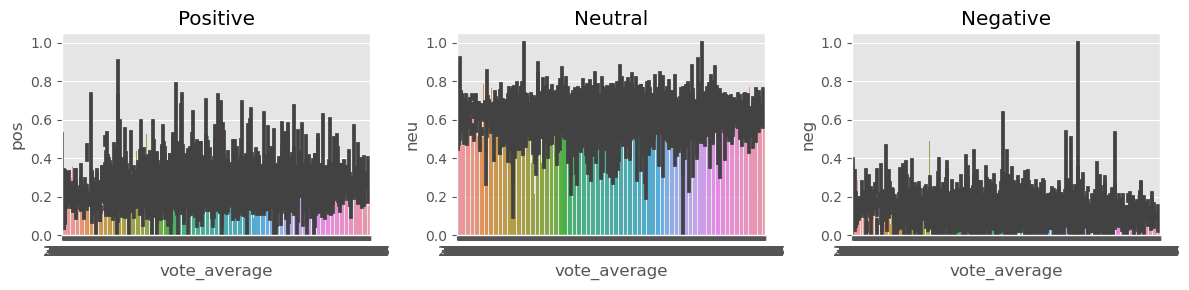

In [ ]:
# fig, axs = plt.subplots(1, 3, figsize=(12, 3))
# sns.barplot(data=vaders, x='vote_average', y='pos', ax=axs[0])
# sns.barplot(data=vaders, x='vote_average', y='neu', ax=axs[1])
# sns.barplot(data=vaders, x='vote_average', y='neg', ax=axs[2])
# axs[0].set_title('Positive')
# axs[1].set_title('Neutral')
# axs[2].set_title('Negative')
# plt.tight_layout()
# plt.show()

## Under Construction:

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

# Genre Dataframe

In [ ]:
import ast

# Genre ID to name mapping
genre_mapping = {
    28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime',
    99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History',
    27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction',
    10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'
}

# Create a column for each genre with a prefix
for genre_id, genre_name in genre_mapping.items():
    column_name = f"type_{genre_name}"
    vaders_df_clean[column_name] = vaders_df_clean['genre_ids'].apply(lambda ids: 1 if genre_id in ast.literal_eval(ids) else 0)

vaders_df_clean.head()

,movie_id,neg,neu,pos,compound,genre_ids,id,original_title,overview,popularity,...,type_History,type_Horror,type_Music,type_Mystery,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western
0,693134,0.069,0.646,0.286,0.9995,"[878, 12]",693134,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,...,0,0,0,0,0,1,0,0,0,0
1,1011985,0.253,0.542,0.205,-0.9793,"[16, 28, 12, 35, 10751]",1011985,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,...,0,0,0,0,0,0,0,0,0,0
2,823464,0.111,0.716,0.173,0.9799,"[28, 878, 12, 14]",823464,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,...,0,0,0,0,0,1,0,0,0,0
3,359410,0.111,0.553,0.336,0.9616,"[28, 53]",359410,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,...,0,0,0,0,0,0,0,1,0,0
4,634492,0.104,0.679,0.217,0.9949,"[28, 14]",634492,Madame Web,"Forced to confront revelations about her past,...",921.140,...,0,0,0,0,0,0,0,0,0,0


#

In [ ]:
vaders_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6123 entries, 0 to 6122
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              6123 non-null   int64  
 1   neg                   6123 non-null   float64
 2   neu                   6123 non-null   float64
 3   pos                   6123 non-null   float64
 4   compound              6123 non-null   float64
 5   genre_ids             6123 non-null   object 
 6   id                    6123 non-null   int64  
 7   original_title        6123 non-null   object 
 8   overview              6123 non-null   object 
 9   popularity            6123 non-null   float64
 10  release_date          6123 non-null   object 
 11  title                 6123 non-null   object 
 12  vote_average          6123 non-null   float64
 13  vote_count            6123 non-null   int64  
 14  cleaned_reviews       6123 non-null   object 
 15  type_Action          

In [ ]:
movies_clean_columns_df = vaders_df_clean.drop(['neg', 'neu','pos','compound','genre_ids','original_title','id'],axis=1)
movies_clean_columns_df.head()

,movie_id,overview,popularity,release_date,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,...,type_History,type_Horror,type_Music,type_Mystery,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western
0,693134,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1011985,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...,1,1,...,0,0,0,0,0,0,0,0,0,0
2,823464,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...,1,1,...,0,0,0,0,0,1,0,0,0,0
3,359410,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,7.066,1379,poor scenario story add ending also convincing...,1,0,...,0,0,0,0,0,0,0,1,0,0
4,634492,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...,1,0,...,0,0,0,0,0,0,0,0,0,0


# Keeping only the necessary columns, dropping all others

In [ ]:
type_columns = movies_clean_columns_df.filter(regex='^type_').columns

# Convert the selected columns to boolean
movies_clean_columns_df[type_columns] = movies_clean_columns_df[type_columns].astype(bool)
movies_clean_columns_df.head()

,movie_id,overview,popularity,release_date,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,...,type_History,type_Horror,type_Music,type_Mystery,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western
0,693134,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...,False,True,...,False,False,False,False,False,True,False,False,False,False
1,1011985,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...,True,True,...,False,False,False,False,False,False,False,False,False,False
2,823464,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...,True,True,...,False,False,False,False,False,True,False,False,False,False
3,359410,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,7.066,1379,poor scenario story add ending also convincing...,True,False,...,False,False,False,False,False,False,False,True,False,False
4,634492,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...,True,False,...,False,False,False,False,False,False,False,False,False,False


# Converting to CSV file, named **movies.csv**

In [ ]:
movies_clean_columns_df.to_csv('C:/Users/tpete/happy-flix/Resources/movies.csv')